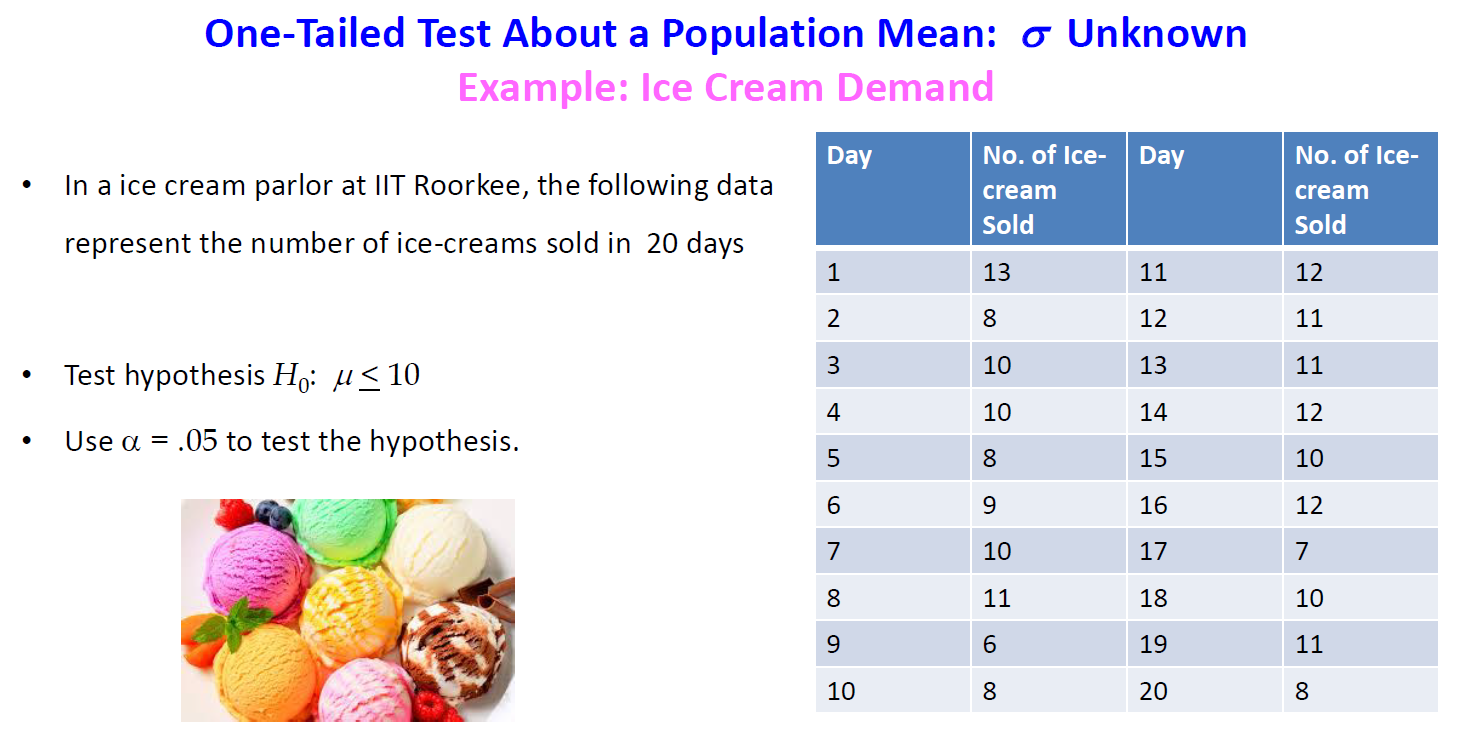

In [9]:
# Given 

n=20
mu_0=10
alpha = 0.05

#  X_bar (sample mean) and sample_std_dev to be find from the data


In [10]:
import pandas as pd
df = pd.read_excel(r"D:\ERA_ML\IIT Roorkee\Dataset\week_4\icecream sale data.xlsx",index_col='Day')
df.head()


,Number of ice cream sold
Day,
1,13
2,8
3,10
4,10
5,8


In [11]:
dependent_variable_series = df['Number of ice cream sold']
x_bar = dependent_variable_series.mean() # sample_mean
#dependent_variable_series.describe()
s = dependent_variable_series.std() # sample_std_dev
print(x_bar,s)

9.85 1.8715318802914815


In [12]:
# Step 1 : Define Hypothesis
# H0: mu<=10
# Ha: mu >10

# Step 2 : Define significance level 
# alpha : 0.05 

# step 3 : Decision control 
# t_test_statistics > t_critical   -- Reject Null  


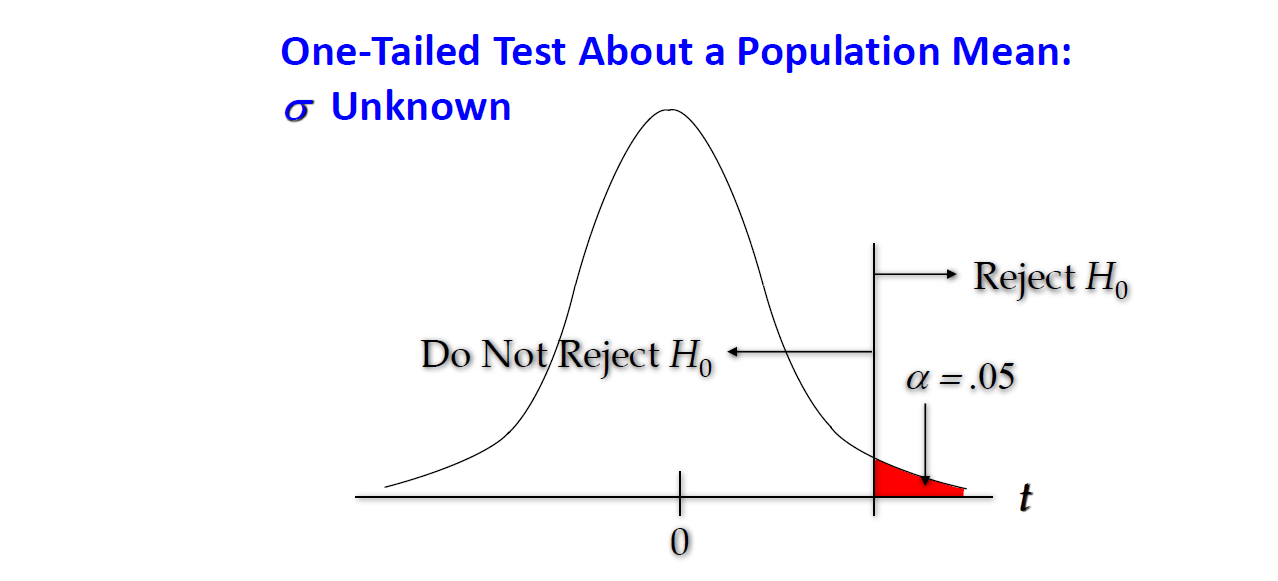

In [13]:
# get t_critical 
from scipy.stats import t
t_critical  = t.ppf(0.95,19)  # I put 0.95 since it is one tail - Right tail  # 19 is degree of freedom
print('t critical: ',t_critical)


#step 4 : Calculate test t statistics 

import math 
def find_t_test_statistics(samp_mean, hypo_mean, sam_std_dev, sample_size):
    standard_error = sam_std_dev/math.sqrt(sample_size)  # Standard deviation of sampling distribution of mean 
    return (samp_mean-hypo_mean)/standard_error

t_test_static = find_t_test_statistics(samp_mean=x_bar, hypo_mean=mu_0, sam_std_dev=s, sample_size=n) 
print('t_test_static: ', t_test_static)


# Find P value for the t_test_statistics
p_value  = t.cdf(t_test_static,19)   # SINCE IT IS RIGHT TAIL TEST , WE HAVE TO FIND CUMULATIVE dISTRIBUTION FUNCTION 
# FOR FINDING THE probablity between -infinity to t_test_statistics
print('p_value for the test statistics is : ', p_value)

# Step 5 : Statistical condition 
### 
print('By P value method')
if p_value<=alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')
    
print('By Critical value method')
if t_test_static>=t_critical:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

t critical:  1.729132811521367
t_test_static:  -0.358433858548785
p_value for the test statistics is :  0.36198517899821253
By P value method
Fail to reject null hypothesis
By Critical value method
Fail to reject null hypothesis


<h1> Scipy Library for t test</h1>

In [16]:
# Using scipy library to do ttest 
from scipy import stats
res = stats.ttest_1samp(dependent_variable_series,mu_0)
print(res)
print(res.statistic)
print(res.pvalue)  # Always ttest_1samp give result for two tailed test , Since we have one tail divide it by 2 
one_tail_pvalue = res.pvalue/2
print(one_tail_pvalue)

print('By P value method')
if one_tail_pvalue<=alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Ttest_1sampResult(statistic=-0.35843385854878496, pvalue=0.7239703579964252)
-0.35843385854878496
0.7239703579964252
0.3619851789982126
By P value method
Fail to reject null hypothesis
